# Multiple Linear Regression - Case Study

In [138]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lmdiag import *
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import jarque_bera
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson
from scipy.stats import boxcox

In [108]:
# Load data
coalUSA2011 = pd.read_csv("coal2011usa.csv")

# Initial data check
print(coalUSA2011.head())
print(coalUSA2011.info())

   Year  MSHA ID                       Mine Name Mine State Mine County  \
0  2011   103381            Tacoa Highwall Miner    Alabama        Bibb   
1  2011   103404                Reid School Mine    Alabama      Blount   
2  2011   100759  North River #1 Underground Min    Alabama     Fayette   
3  2011   103374                   Meredyth Mine    Alabama    Franklin   
4  2011   100851                  Oak Grove Mine    Alabama   Jefferson   

    MineBasin Mine Status     MineType                  Company Type  \
0  Appalachia      Active      Surface  Indepedent Producer Operator   
1  Appalachia      Active      Surface  Indepedent Producer Operator   
2  Appalachia      Active  Underground  Indepedent Producer Operator   
3  Appalachia      Active      Surface  Indepedent Producer Operator   
4  Appalachia      Active  Underground          Operating Subsidiary   

                OperationType              Operating Company  \
0                   Mine only             Tacoa Mine

In [109]:
# Correlation check
correlation = coalUSA2011[['LaborHours', 'AverageEmployees']].corr()
print(correlation)

                  LaborHours  AverageEmployees
LaborHours          1.000000          0.993529
AverageEmployees    0.993529          1.000000


In [110]:
# Build base model
coalUSA2011lm = smf.ols('Production ~ MineBasin + MineType + OperationType + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.53e-97
Time:                        16:45:06   Log-Likelihood:                -11594.
No. Observations:                 691   AIC:                         2.320e+04
Df Residuals:                     685   BIC:                         2.323e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\134410622.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


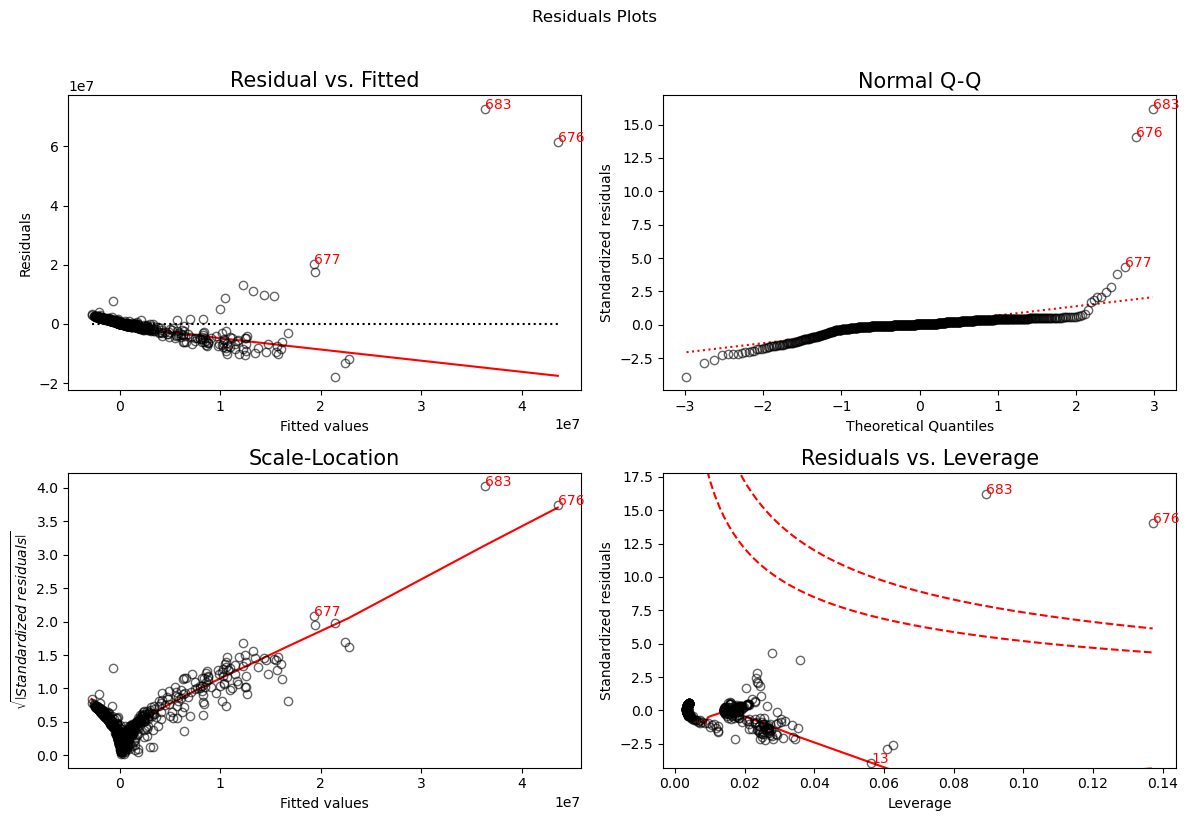

In [111]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [181]:
# Box-Cox Transformation
production_boxcox, lambda_value = boxcox(coalUSA2011['Production'])
coalUSA2011['Production_boxcox'] = production_boxcox
print(lambda_value)

-0.4240836422637395


In [112]:
# Transformation
coalUSA2011['Production_log'] = np.log(coalUSA2011['Production'])
coalUSA2011['Production_sqrt'] = -1 / np.sqrt(coalUSA2011['Production'])

In [196]:
coalUSA2011lm1 = smf.ols('Production_sqrt ~ MineBasin + MineType + OperationType + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Production_sqrt   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.92e-109
Time:                        21:10:08   Log-Likelihood:                 4221.3
No. Observations:                 691   AIC:                            -8431.
Df Residuals:                     685   BIC:                            -8403.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [197]:
# OperationType (binary) is not significant.  Let us remove and rebuild
coalUSA2011lm1 = smf.ols('Production_sqrt ~ MineBasin + MineType + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Production_sqrt   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     191.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.18e-110
Time:                        21:12:48   Log-Likelihood:                 4220.8
No. Observations:                 691   AIC:                            -8432.
Df Residuals:                     686   BIC:                            -8409.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [200]:
# MineType (binary) is not significant.  let us remove and rebuild.
coalUSA2011lm1 = smf.ols('Production_sqrt ~ MineBasin + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Production_sqrt   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     255.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.12e-111
Time:                        21:21:22   Log-Likelihood:                 4220.3
No. Observations:                 691   AIC:                            -8433.
Df Residuals:                     687   BIC:                            -8414.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.00

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\1585351411.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


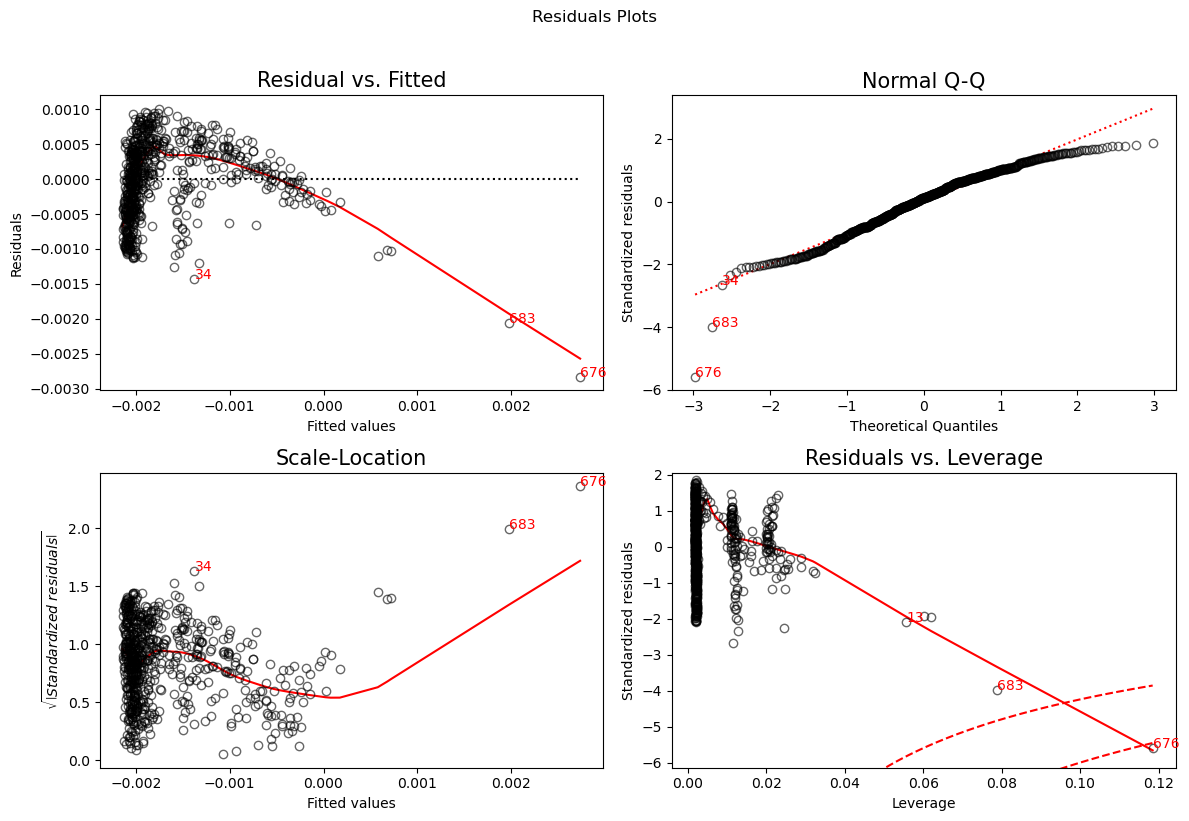

In [199]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm1)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [201]:
# Build models with transformations
coalUSA2011lm2 = smf.ols('Production_log ~ MineBasin + MineType + OperationType + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Production_log   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     410.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.18e-203
Time:                        21:26:41   Log-Likelihood:                -642.93
No. Observations:                 691   AIC:                             1298.
Df Residuals:                     685   BIC:                             1325.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [202]:
# Remove OperationType and rebuild a simpler model.
coalUSA2011lm2 = smf.ols('Production_log ~ MineBasin + MineType + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         Production_log   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     513.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.31e-204
Time:                        21:29:14   Log-Likelihood:                -643.30
No. Observations:                 691   AIC:                             1297.
Df Residuals:                     686   BIC:                             1319.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\1843878120.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


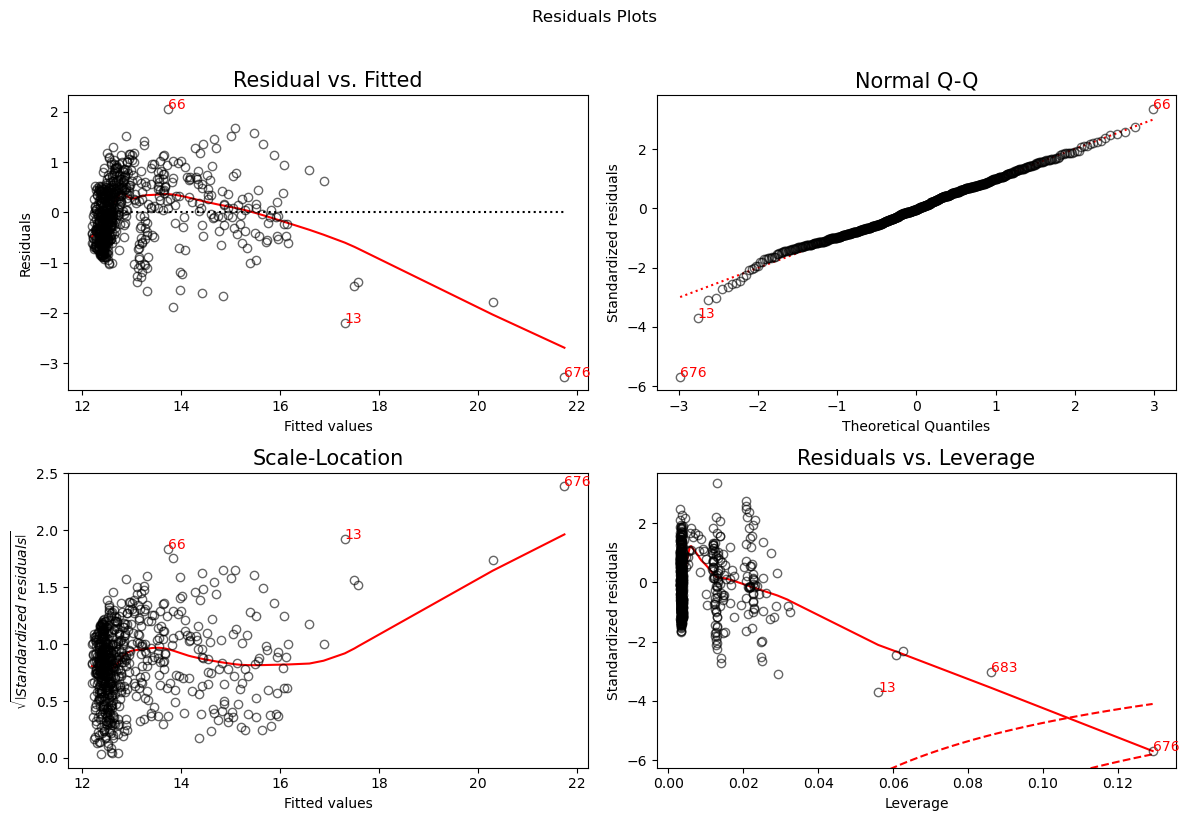

In [204]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm2)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [118]:
coalUSA2011lm_boxcox = smf.ols('Production_boxcox ~ MineBasin + MineType + LaborHours', data=coalUSA2011).fit()
print(coalUSA2011lm_boxcox.summary())

                            OLS Regression Results                            
Dep. Variable:      Production_boxcox   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     217.8
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.46e-120
Time:                        16:45:43   Log-Likelihood:                 3083.8
No. Observations:                 691   AIC:                            -6158.
Df Residuals:                     686   BIC:                            -6135.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\3835215043.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


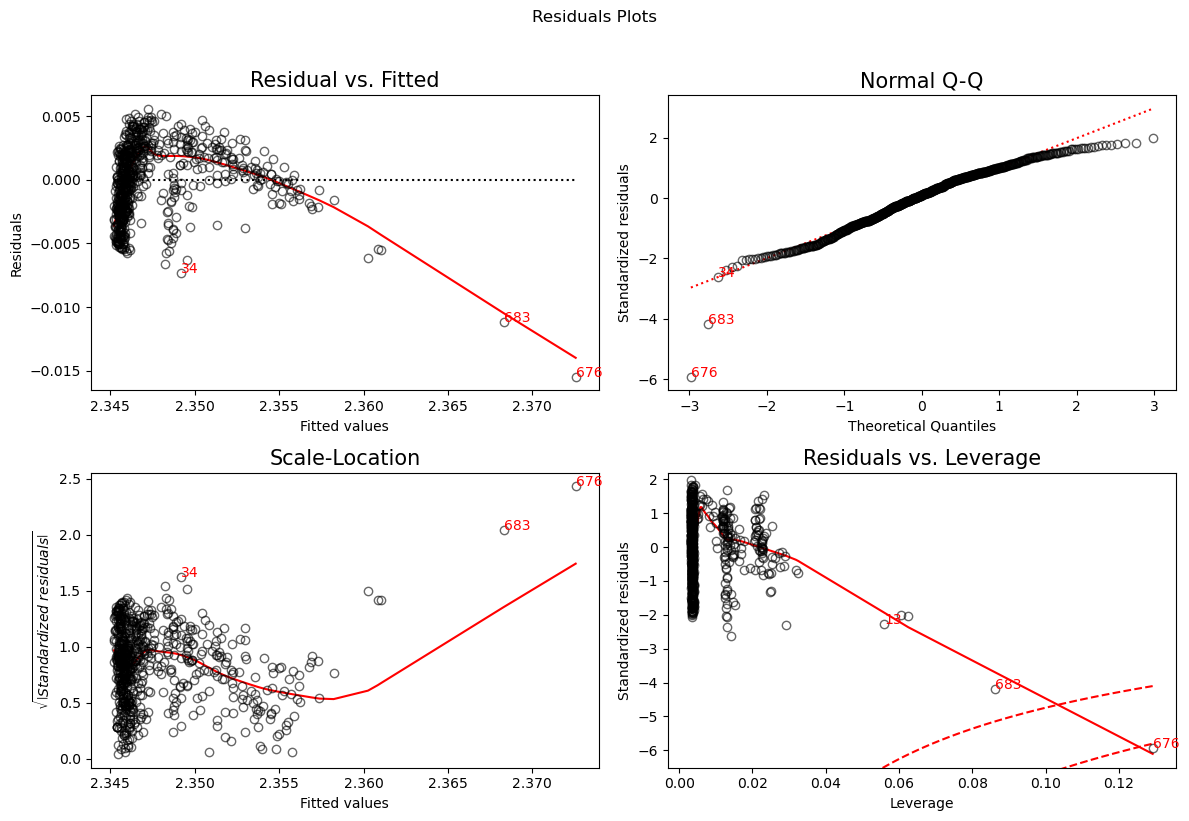

In [119]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm_boxcox)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [122]:
# Multicollinearity check
X = coalUSA2011[['AverageEmployees', 'LaborHours']]
X_with_constant = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(1, X_with_constant.shape[1])]
print(vif_data)

            feature        VIF
0  AverageEmployees  77.513466
1        LaborHours  77.513466


### _Manual Calculation of VIF_

In [123]:
X = sm.add_constant(coalUSA2011['AverageEmployees'])
model = sm.OLS(coalUSA2011['LaborHours'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             LaborHours   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.272e+04
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:46:17   Log-Likelihood:                -8303.0
No. Observations:                 691   AIC:                         1.661e+04
Df Residuals:                     689   BIC:                         1.662e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9657.8318   1885.112  

In [124]:
# VIF

1/(1-model.rsquared)

77.51346618670453

In [205]:
# Interaction terms
coalUSA2011['LaborHours_scaled'] = (coalUSA2011['LaborHours'] - coalUSA2011['LaborHours'].mean()) / coalUSA2011['LaborHours'].std()
coalUSA2011lm3 = smf.ols('Production_log ~ MineBasin + MineType + LaborHours_scaled * MineBasin + LaborHours_scaled * MineType', data=coalUSA2011).fit()
print(coalUSA2011lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         Production_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     363.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.67e-225
Time:                        21:43:09   Log-Likelihood:                -585.19
No. Observations:                 691   AIC:                             1186.
Df Residuals:                     683   BIC:                             1223.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\3715267500.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


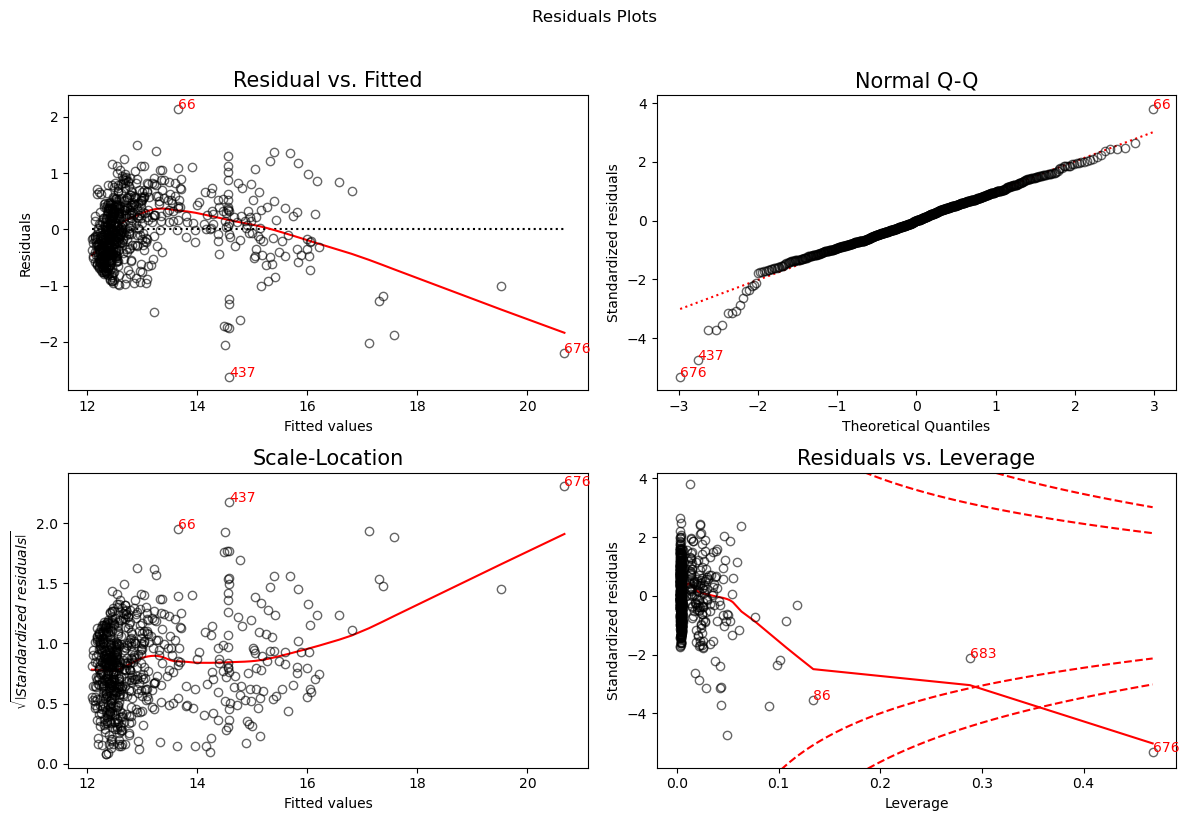

In [206]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm3)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

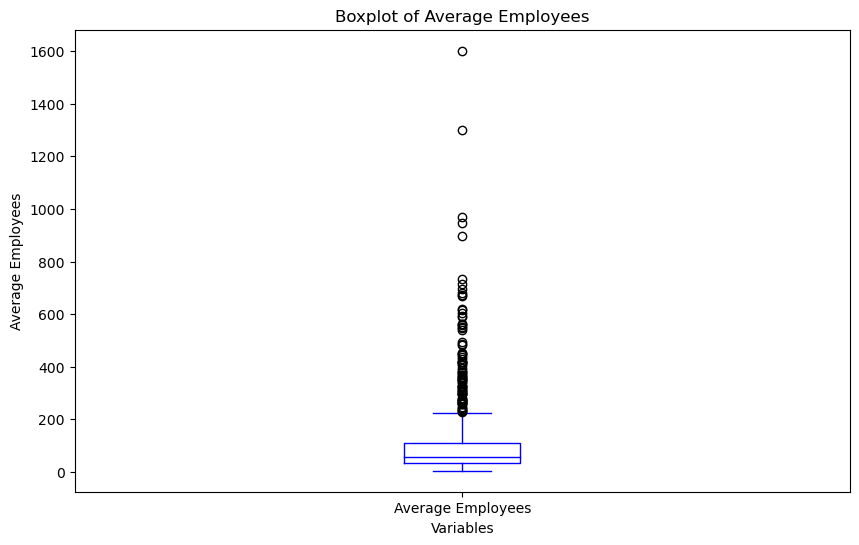

In [127]:
# Outlier detection using Box plot

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot for AverageEmployees on the primary y-axis
coalUSA2011['AverageEmployees'].plot(kind='box', ax=ax, color='blue', label='Average Employees')

# Set labels and title for the plot
ax.set_ylabel('Average Employees')
ax.set_xlabel('Variables')
ax.set_title('Boxplot of Average Employees')

# Show the plot
plt.show()

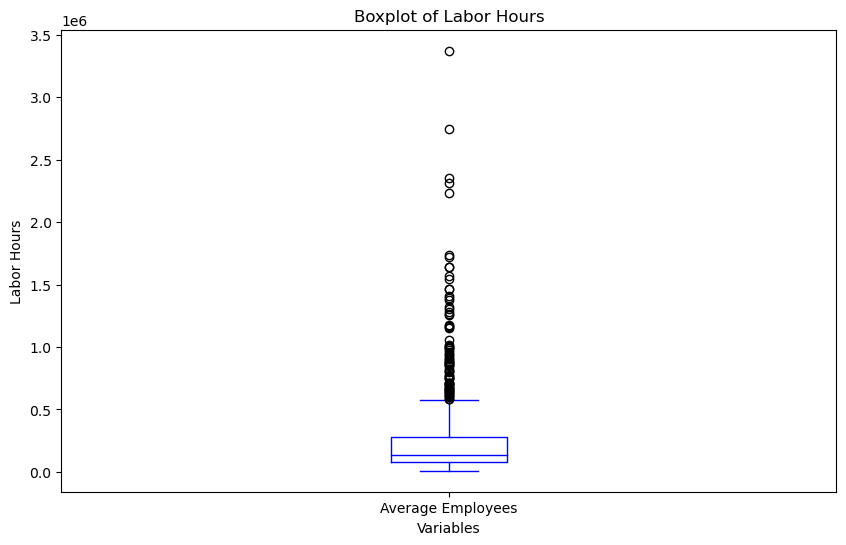

In [128]:
# Outlier detection using Box plot

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot for AverageEmployees on the primary y-axis
coalUSA2011['LaborHours'].plot(kind='box', ax=ax, color='blue', label='Average Employees')

# Set labels and title for the plot
ax.set_ylabel('Labor Hours')
ax.set_xlabel('Variables')
ax.set_title('Boxplot of Labor Hours')

# Show the plot
plt.show()

In [207]:
# Outlier detection
outliers = coalUSA2011[(coalUSA2011['AverageEmployees'] > 1000)]
relevant_variables = ['Year','Mine State', 'Mine County', 'MineBasin', 'MineType', 'OperationType',
                             'Production', 'AverageEmployees', 'LaborHours']
outliers_relevant = outliers[relevant_variables]
outliers_relevant_transposed = outliers_relevant.transpose()
print(outliers_relevant_transposed)

                                         676                         683
Year                                    2011                        2011
Mine State                           Wyoming                     Wyoming
Mine County                         Campbell                    Campbell
MineBasin                            Western                     Western
MineType                             Surface                     Surface
OperationType     Mine and Preparation Plant  Mine and Preparation Plant
Production                         104958277                   109064323
AverageEmployees                        1602                        1302
LaborHours                           3372128                     2748582


In [208]:
# Model update after outlier removal
coalUSA2011Minus676_683 = pd.read_csv("D:\Academics\BTech\DSC4.51015_StatisticalModeling-1\Session 05\coal2011usa_Minus676-683.csv")

# Transformation
coalUSA2011Minus676_683['Production_log'] = np.log(coalUSA2011Minus676_683['Production'])
coalUSA2011Minus676_683['Production_sqrt'] = -1 / np.sqrt(coalUSA2011Minus676_683['Production'])
coalUSA2011Minus676_683['LaborHours_scaled'] = (coalUSA2011Minus676_683['LaborHours'] - coalUSA2011Minus676_683['LaborHours'].mean()) / coalUSA2011Minus676_683['LaborHours'].std()

In [209]:
coalUSA2011lm4 = smf.ols('Production_log ~ MineBasin + MineType + LaborHours_scaled * MineBasin + LaborHours_scaled * MineType', data=coalUSA2011Minus676_683).fit()
print(coalUSA2011lm4.summary())

                            OLS Regression Results                            
Dep. Variable:         Production_log   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     387.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.71e-232
Time:                        21:51:30   Log-Likelihood:                -546.39
No. Observations:                 689   AIC:                             1109.
Df Residuals:                     681   BIC:                             1145.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\1093430500.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


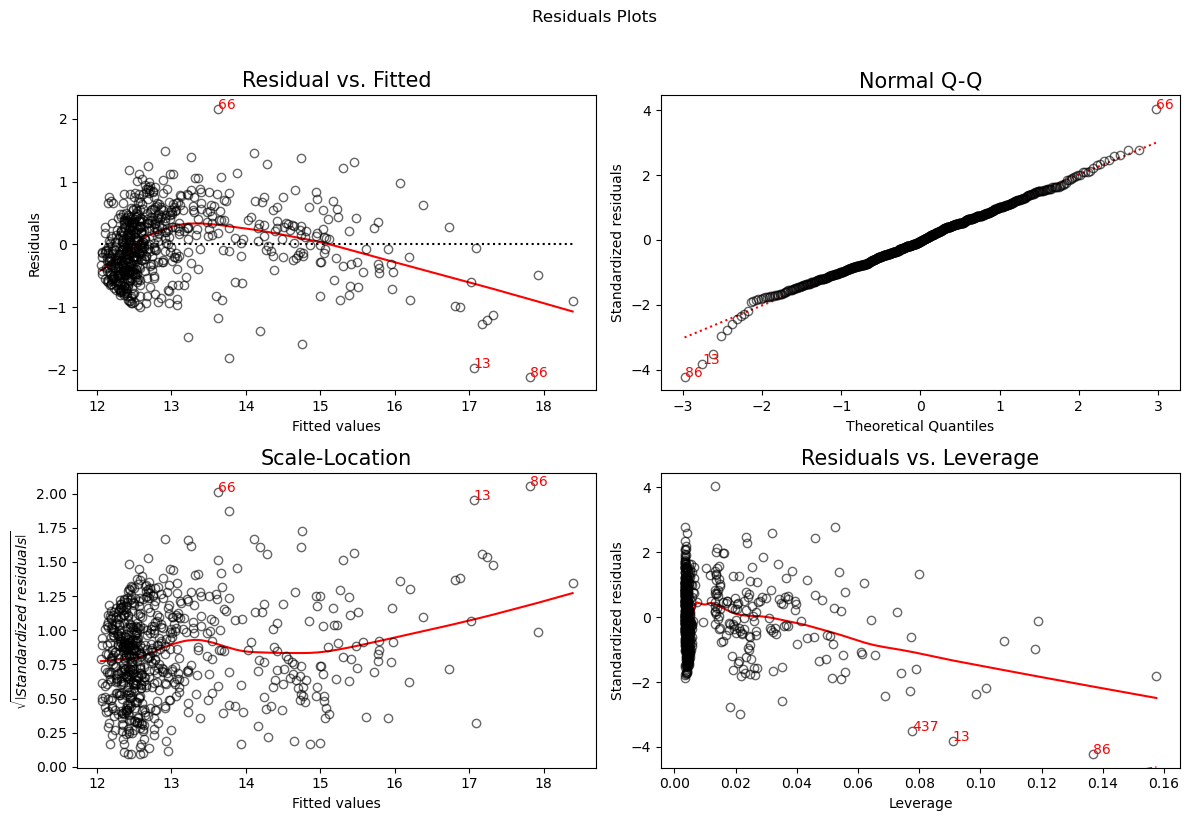

In [210]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm4)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [211]:
# Yeo-Johnson transformation on LaborHours
transformed_data, lambda_value = yeojohnson(coalUSA2011Minus676_683['LaborHours'])
print(lambda_value)

-0.0929697210689427


In [212]:
coalUSA2011Minus676_683['LaborHours_log'] = np.log(coalUSA2011Minus676_683['LaborHours'])
coalUSA2011Minus676_683['LaborHours_sqrt'] = coalUSA2011Minus676_683['LaborHours'] ** 0.5
coalUSA2011lm5 = smf.ols('Production_log ~ MineBasin + LaborHours_sqrt * MineType', data=coalUSA2011Minus676_683).fit()
print(coalUSA2011lm5.summary())

                            OLS Regression Results                            
Dep. Variable:         Production_log   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     817.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.86e-285
Time:                        21:54:27   Log-Likelihood:                -429.61
No. Observations:                 689   AIC:                             871.2
Df Residuals:                     683   BIC:                             898.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

C:\Users\pappu\AppData\Local\Temp\ipykernel_78408\2854848364.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Add space between the title and plots


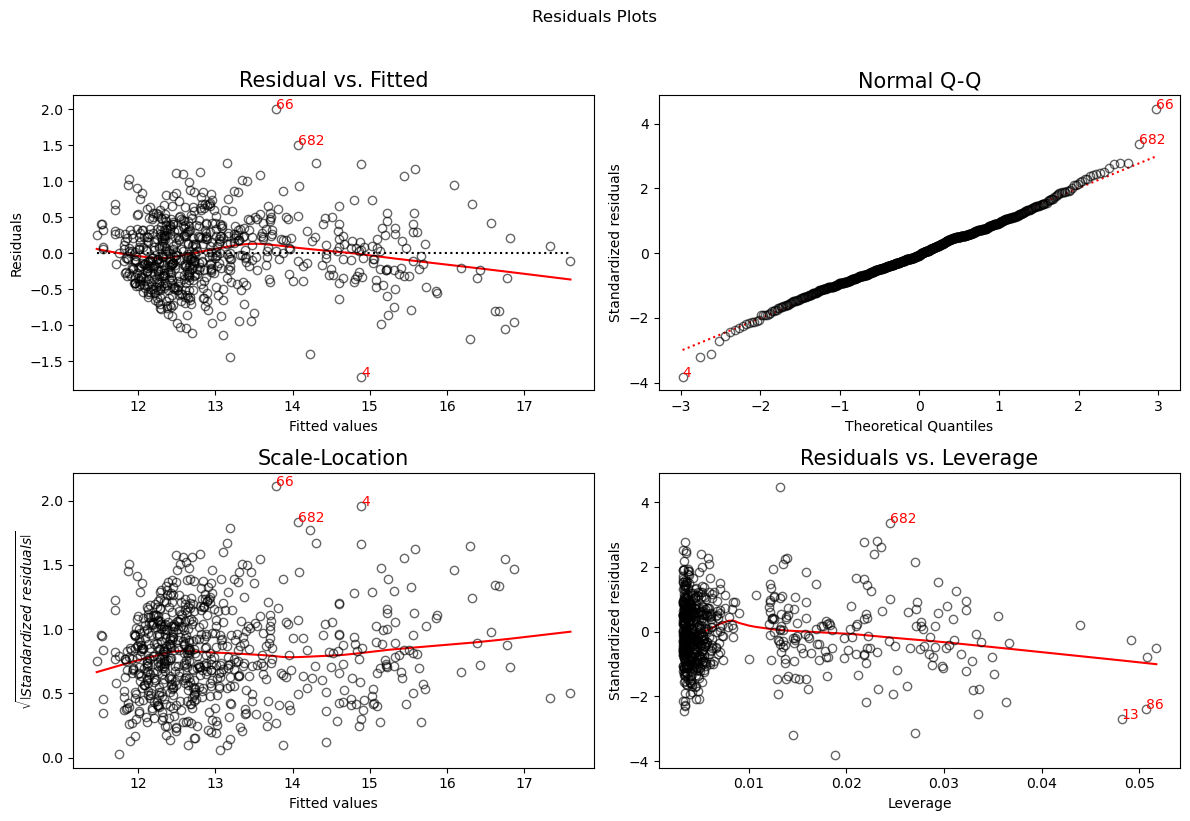

In [213]:
# Residual plots
plt.figure(figsize=(12, 8))

plot(coalUSA2011lm5)
plt.suptitle('Residuals Plots', y=1.02)  # Adjust the y-coordinate for space
plt.tight_layout()  # Add space between the title and plots
plt.show()

In [216]:
# Model evaluation

# Predicted values
yhatlm = coalUSA2011lm.predict()
yhatlm1 = coalUSA2011lm1.predict()**2
yhatlm2 = np.exp(coalUSA2011lm2.predict(coalUSA2011))
yhatlm3 = np.exp(coalUSA2011lm3.predict(coalUSA2011))
yhatlm4 = np.exp(coalUSA2011lm4.predict(coalUSA2011Minus676_683))
yhatlm5 = np.exp(coalUSA2011lm5.predict(coalUSA2011Minus676_683))

In [217]:
# Calculate MAPE for coalUSA2011lm
mape = np.mean(np.abs(coalUSA2011['Production'] - yhatlm) / coalUSA2011['Production'])
print("MAPE for coalUSA2011lm:", mape)

# Repeat for other models
mape1 = np.mean(np.abs(coalUSA2011['Production'] - yhatlm1) / coalUSA2011['Production'])
print("MAPE for coalUSA2011lm1:", mape1)

mape2 = np.mean(np.abs(coalUSA2011['Production'] - yhatlm2) / coalUSA2011['Production'])
print("MAPE for coalUSA2011lm2:", mape2)

mape3 = np.mean(np.abs(coalUSA2011['Production'] - yhatlm3) / coalUSA2011['Production'])
print("MAPE for coalUSA2011lm3:", mape3)

mape4 = np.mean(np.abs(coalUSA2011Minus676_683['Production'] - yhatlm4) / coalUSA2011Minus676_683['Production'])
print("MAPE for coalUSA2011lm4:", mape4)

mape5 = np.mean(np.abs(coalUSA2011Minus676_683['Production'] - yhatlm5) / coalUSA2011Minus676_683['Production'])
print("MAPE for coalUSA2011lm5:", mape5)

MAPE for coalUSA2011lm: 3.963787644295306
MAPE for coalUSA2011lm1: 0.9999999999862589
MAPE for coalUSA2011lm2: 0.582224991291435
MAPE for coalUSA2011lm3: 0.5199757291566702
MAPE for coalUSA2011lm4: 0.4749413888334699
MAPE for coalUSA2011lm5: 0.3792388698807554
